In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


# CONECTAR A MAESTROS DIVISAS

In [6]:
import requests

# URL base de la API (reemplaza por la real)
base_url = "https://api.bcra.gob.ar"
endpoint = "/estadisticascambiarias/v1.0/Maestros/Divisas"
url = base_url + endpoint

# No se requieren parámetros ni headers especiales según la documentación
try:
    response = requests.get(url, headers={"Accept": "text/plain"}, verify=False)
    response.raise_for_status()  # Lanza un error si la respuesta no es 200

    data = response.json()
    print("Status:", data.get("status"))
    print("Resultados:")
    for divisa in data.get("results", []):
        print(f"Código: {divisa['codigo']}, Denominación: {divisa['denominacion']}")

except requests.RequestException as e:
    print("Error al conectar con la API:", e)
except ValueError:
    print("La respuesta no es JSON válido.")

Status: 200
Resultados:
Código: ARS, Denominación: PESO
Código: ATS, Denominación: CHELINES AUSTRIACOS
Código: AUD, Denominación: DOLAR AUSTRALIA
Código: AWG, Denominación: FLORIN (ANTILLAS HOLANDESAS)
Código: BOB, Denominación: BOLIVIANOS
Código: BRL, Denominación: REAL
Código: CAD, Denominación: DOLAR CANADIEN.
Código: CHF, Denominación: FRANCO SUIZO
Código: CLP, Denominación: PESO CHILENO
Código: CNH, Denominación: YUAN CNH RENMINBI OFF SHORE
Código: CNY, Denominación: YUAN CNY RENMINBI
Código: COP, Denominación: COLOMBIANOS
Código: CZK, Denominación: CORONAS CHECAS
Código: DEM, Denominación: MARCO ALEMAN
Código: DKK, Denominación: CORONAS DANESAS
Código: ESP, Denominación: PESETA
Código: EUR, Denominación: EURO
Código: GBP, Denominación: LIBRA ESTERLINA
Código: HKD, Denominación: DOLAR HONG KONG
Código: ILS, Denominación: LIBRA ISRAELI
Código: INR, Denominación: RUPIA (INDIA)
Código: ITL, Denominación: LIRA ITALIANA
Código: JPY, Denominación: YENS
Código: MXP, Denominación: PESO ME

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


# CONECTAR A PRINCIPALES VARIABLES

In [8]:

api = "https://api.bcra.gob.ar/estadisticas/v2.0/principalesvariables"

# Función para hacer la petición a la API
def obtener_datos_bcra():
  url = f"{api}"
  response = requests.get(url, verify=False) # Desactiva la verificación SSL
  return response.json()


df = pd.DataFrame(obtener_datos_bcra()["results"])
df.head()

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,idVariable,cdSerie,descripcion,fecha,valor
0,1,246,Reservas Internacionales del BCRA (en millones...,2025-04-30,38928.0000
1,4,7927,Tipo de Cambio Minorista ($ por USD) Comunicac...,2025-05-06,1220.4500
2,5,272,Tipo de Cambio Mayorista ($ por USD) Comunicac...,2025-05-06,1203.8300
3,6,7935,Tasa de Política Monetaria (en % n.a.),2025-05-06,29.0000
4,7,1222,BADLAR en pesos de bancos privados (en % n.a.),2025-05-05,32.1875


# PRINCIPALES VARIABLES V3

In [11]:
import requests
import pandas as pd

api_2 = "https://api.bcra.gob.ar/estadisticas/v3.0/Monetarias"

def obtener_datos_bcra():
    url = f"{api_2}"
    response = requests.get(url, verify=False)  # Desactiva la verificación SSL
    response.raise_for_status()  # Lanza error si la respuesta no es 200
    return response.json()

df = pd.DataFrame(obtener_datos_bcra()["results"])
print(df.head())

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


   idVariable                                        descripcion  \
0           1  Reservas Internacionales del BCRA (en millones...   
1           4  Tipo de Cambio Minorista ($ por USD) Comunicac...   
2           5  Tipo de Cambio Mayorista ($ por USD) Comunicac...   
3           6             Tasa de Política Monetaria (en % n.a.)   
4           7     BADLAR en pesos de bancos privados (en % n.a.)   

               categoria       fecha       valor  
0  Principales Variables  2025-04-30  38928.0000  
1  Principales Variables  2025-05-06   1220.4500  
2  Principales Variables  2025-05-06   1203.8300  
3  Principales Variables  2025-05-06     29.0000  
4  Principales Variables  2025-05-05     32.1875  


In [12]:
df.head()

,idVariable,descripcion,categoria,fecha,valor
0,1,Reservas Internacionales del BCRA (en millones...,Principales Variables,2025-04-30,38928.0000
1,4,Tipo de Cambio Minorista ($ por USD) Comunicac...,Principales Variables,2025-05-06,1220.4500
2,5,Tipo de Cambio Mayorista ($ por USD) Comunicac...,Principales Variables,2025-05-06,1203.8300
3,6,Tasa de Política Monetaria (en % n.a.),Principales Variables,2025-05-06,29.0000
4,7,BADLAR en pesos de bancos privados (en % n.a.),Principales Variables,2025-05-05,32.1875


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idVariable   189 non-null    int64  
 1   descripcion  189 non-null    object 
 2   categoria    189 non-null    object 
 3   fecha        189 non-null    object 
 4   valor        189 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.5+ KB


# BUSCAR LA SERIE DE UNA VARIABLE Y GRAFICARLA



In [15]:
import requests
import pandas as pd

# Paso 1: Obtener todos los idVariable y buscar el de reservas
url_variables = "https://api.bcra.gob.ar/estadisticas/v3.0/Monetarias"
response = requests.get(url_variables, verify=False)
variables = pd.DataFrame(response.json()["results"])

# Filtrar por la palabra 'reserva' (puedes ajustar el filtro según el nombre exacto)
print(variables[variables["descripcion"].str.contains("Reservas Internacionales del BCRA", case=False)])

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


   idVariable                                        descripcion  \
0           1  Reservas Internacionales del BCRA (en millones...   

               categoria       fecha    valor  
0  Principales Variables  2025-04-30  38928.0  


In [16]:
id_reservas = 1  # Cambia este valor por el correcto si es diferente
url_reservas = f"https://api.bcra.gob.ar/estadisticas/v3.0/Monetarias/{id_reservas}"

response = requests.get(url_reservas, verify=False)
data = response.json()["results"]

# Convertir a DataFrame
df = pd.DataFrame(data)
df["fecha"] = pd.to_datetime(df["fecha"])
df = df.sort_values("fecha")

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


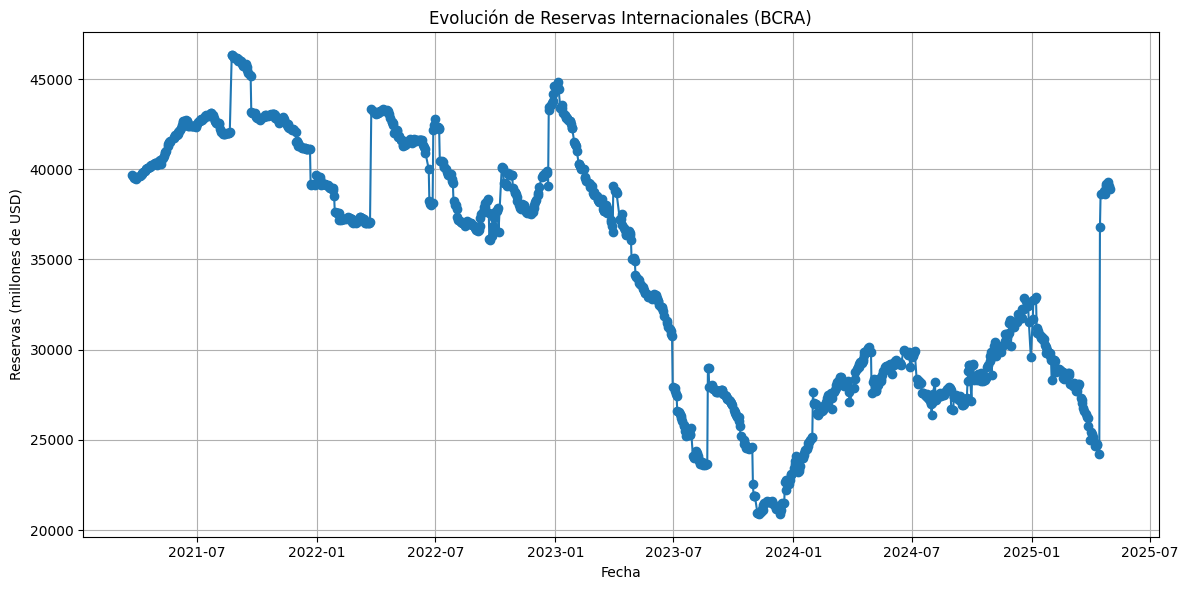

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df["fecha"], df["valor"], marker="o")
plt.title("Evolución de Reservas Internacionales (BCRA)")
plt.xlabel("Fecha")
plt.ylabel("Reservas (millones de USD)")
plt.grid(True)
plt.tight_layout()
plt.show()